# CSE 625 Project 1 
Christopher Moore 
06/09/2023

## Problem 1

### 1.1 

the eps() function returns the distance from 1.0 to the next largest representable floating point number for the tye of float using eps(x) gives the difference between that number and the next larger representable floating point value, such that x + eps(x) = next largest float. running the eps(x) passing in 0 as both a 32 bit and 64 bit number shows the smallest representable positive floating point number for each data type.

this is beacause all floating point numbers cannot be represented with 64 and 32 bit floats and have to be estimated with bits.

In [6]:
eps32 = eps(0f0)
eps64 = eps(0.0)

print(eps32, " ", eps64)

1.0e-45 5.0e-324

### 1.2

In [7]:
v = fill(eps32, 2_000_000_000)

function loopsum(a)
    sum = 0
    for i=1:length(a)
        sum += a[i]
    end
    return sum
end

print("loop: ")
@time l = loopsum(v)
println("Returned Sum: ", l)
print("foldr: ")
@time f = foldr(+, v)
println("Returned Sum: ", f)
print("reduce: ")
@time r = reduce(+, v)
println("Returned Sum: ", r)
print("sum: ")
@time s = sum(v)
println("Returned Sum: ", s)

loop: 

  6.404604 seconds (3.10 k allocations: 212.651 KiB, 0.63% compilation time)
Returned Sum: 2.3509887e-38


foldr:   3.307129 seconds (4 allocations: 64 bytes)
Returned Sum: 2.3509887e-38


reduce:   0.955752 seconds (1 allocation: 16 bytes)
Returned Sum: 2.802597e-36


sum:   0.938670 seconds (1 allocation: 16 bytes)
Returned Sum: 2.802597e-36


In [8]:
println("l: ", typeof(l))
println("f: ", typeof(f))
println("r: ", typeof(r))
println("s: ", typeof(s))

l: Float32
f: Float32
r: Float32
s: Float32


## Problem 2

### 2.1

the following two functions implement the fibonacci sequence using matrix exponentiation. The following eqution represents the sequence.
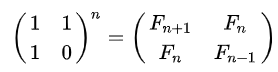

the resulting 2x2 matrix is multiplied by a 2x1 matrix reducing the result to a 2x1 matrix.
fib_1(n) multiplies the matrix by [1 0] resulting in the matrix [F<sub>n+1</sub>, F<sub>n</sub>]
fib_2(n) multiplies the matrix by [1,1] resulting in the matrix [F<sub>n+1</sub> + F<sub>n</sub>, F<sub>n</sub> + F<sub>n-1</sub>]

In [9]:
fib_1(n) = first([1 1;1 0]^(n-1)*[1,0])
fib_2(n) = last( [1 1;1 0]^(n-1)*[1,1])


fib_2 (generic function with 1 method)

### 2.2

In [10]:
function fib_r(n::Integer)
    #if(n <= 2) return 1
    n <= 2 && return 1
    #else return ...
    return fib_r(n-1) + fib_r(n-2)
end

fib_r (generic function with 1 method)

### 2.3
comparing the computation time between the different implementations of the fibonacci function we can see that fib_1 and fib_2 are signifigantly faster when trying to compute larger values in the fibonacci sequence. caluclating the 40th digit takes microseconds for the first function as compared to the half a second the recursive function takes. Each call of fib_r() creates to new calls to itself, which is extremely costly. 

In [11]:
time1 = []
time2 = []
timer = []
sampleRange = 20:40
for i=sampleRange
    push!(time1, @elapsed fib_1(i))
    push!(time2, @elapsed fib_2(i))
    push!(timer, @elapsed fib_r(i))
end


In [12]:
pn = lpad("n",4)
pfib_1 = rpad("fib_1", 10)
pfib_2 = rpad("fib_2", 10)
pfib_r = rpad("fib_r", 10)
println(pn," | ",pfib_1," | ",pfib_2," | ",pfib_r)
println("-------------------------------------")
for s = 1:length(time1)
    pn = lpad(sampleRange[s], 4)
    pfib_1 = rpad(time1[s], 10)
    pfib_2 = rpad(time2[s], 10)
    pfib_r = rpad(timer[s], 10)
    println(pn," | ",pfib_1," | ",pfib_2," | ",pfib_r)
end
    

   n | fib_1      | fib_2      | fib_r     
-------------------------------------
  20 | 3.6834583  | 0.0202971  | 0.0101727 
  21 | 5.0e-6     | 2.2e-6     | 4.21e-5   
  22 | 9.0e-7     | 7.0e-7     | 9.01e-5   
  23 | 1.3e-6     | 1.0e-6     | 0.0001098 
  24 | 2.0e-6     | 2.0e-6     | 0.0002102 
  25 | 

1.2e-6     | 8.0e-7     | 0.0003224 
  26 | 1.9e-6     | 7.0e-7     | 0.0005149 
  27 | 1.3e-6     | 8.0e-7     | 0.0008324 
  28 | 1.4e-6     | 9.0e-7     | 0.0013477 
  29 | 1.3e-6     | 7.0e-7     | 0.0021365 
  30 | 1.5e-6     | 9.0e-7     | 0.0034659 
  31 | 1.6e-6     | 1.0e-6     | 0.0061847 
  32 | 4.9e-6     | 1.2e-6     | 0.0081745 
  33 | 2.4e-6     | 9.0e-7     | 0.0137545 
  34 | 3.7e-6     | 1.0e-6     | 0.0223709 
  35 | 4.6e-6     | 1.1e-6     | 0.0449216 
  36 | 4.0e-6     | 1.2e-6     | 0.0939042 
  37 | 4.2e-6     | 1.1e-6     | 0.1185914 
  38 | 5.1e-6     | 1.2e-6     | 0.2248309 
  39 | 7.0e-6     | 2.6e-6     | 0.2735976 
  40 | 5.9e-6     | 1.9e-6     | 0.5257383 


## Problem 3

### 3.1


In [13]:
function sinx(x, n::Integer, degree::Bool)
    if degree x *= π/180 end
    result = 0
    for n=0:n-1
        result += (-1)^n * x^(2n+1) / factorial(big(2n+1))
    end
    return result
end

sinx (generic function with 1 method)

In [14]:
angleRange = 1:10:90

xresult::Vector{AbstractFloat} = []
dresult = []
for d=angleRange
    push!(xresult, sinx(d, 5, true))
    push!(dresult, sind(d))
end

In [15]:
pd = lpad("d",4)
psinx = lpad("sinx", 8)
psind = lpad("sind", 8)
println(pd," | ",psinx," | ",psind)
println("-------------------------------------")
for a=1:length(xresult)
    pd = lpad(angleRange[a], 4)
    psinx = lpad(round(xresult[a], digits=4), 6)
    psind = lpad(round(dresult[a], digits=4), 6)
    println(pd," | ",psinx," | ",psind,)
end

   d |     sinx |     sind
-------------------------------------


   1 | 0.01749999999999999999999999999999999999999999999999999999999999999999999999999996 | 0.0175
  11 | 0.1907999999999999999999999999999999999999999999999999999999999999999999999999997 | 0.1908
  21 | 0.3583999999999999999999999999999999999999999999999999999999999999999999999999995 | 0.3584
  31 | 0.5149999999999999999999999999999999999999999999999999999999999999999999999999997 |  0.515
  41 | 0.6560999999999999999999999999999999999999999999999999999999999999999999999999999 | 0.6561
  51 | 0.7770999999999999999999999999999999999999999999999999999999999999999999999999977 | 0.7771
  61 | 0.8745999999999999999999999999999999999999999999999999999999999999999999999999998 | 0.8746
  71 | 0.9454999999999999999999999999999999999999999999999999999999999999999999999999958 | 0.9455
  81 | 0.9877000000000000000000000000000000000000000000000000000000000000000000000000018 | 0.9877


### 3.2

the implemention of sinx is slower compared to the built in sind funtion julia provides. 

In [16]:
function x(inc)
    for angle = 1:inc:90
        sinx(angle, 10, true)
    end
end

function d(inc)
    for angle = 1:inc:90
        sind(angle)
    end
end

incRange = [0.1 0.01 0.001 0.000_1 0.000_01 0.000_001 0.000_000_1]
xtime = []
dtime = []
for i=incRange
    push!(xtime, @elapsed x(i))
    push!(dtime, @elapsed d(i))
end

In [17]:
pd = lpad("inc",length("1.0e-6"))
psinx = lpad("sinx", 8)
psind = lpad("sind", 8)
println(pd," | ",psinx," | ",psind)
println("-------------------------------------")
for a=1:length(xtime)
    pd = lpad(incRange[a], length("1.0e-6"))
    psinx = lpad(round(xtime[a], digits=4), 9)
    psind = lpad(round(dtime[a], digits=4), 9)
    println(pd," | ",psinx," | ",psind,)
end

   inc |     sinx |     sind
-------------------------------------


   0.1 |    0.2483 |    0.0481
  0.01 |    0.1737 |    0.0003
 0.001 |    1.5092 |    0.0015
0.0001 |   12.2372 |    0.0178
1.0e-5 |   95.4792 |    0.1968
1.0e-6 |  946.3867 |    1.8715
1.0e-7 | 9717.3899 |    17.533
